In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,NaN,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	2
float64		column 3	5
float64		column 4	2
float64		column 5	2
float64		column 6	1
float64		column 7	3
float64		column 8	2
float64		column 9	4
float64		column 10	5
float64		column 11	3
float64		column 12	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,397.000000,398.000000,395.000000,398.000000,398.000000,399.000000,397.000000,398.000000,396.000000,395.000000,397.000000,396.000000
mean,-0.071601,0.085849,2.028252,1.903399,1.932594,1.974055,2.027328,1.980440,1.974501,2.013291,1.964104,1.951717
std,2.543260,2.752613,1.127804,1.147681,1.161617,1.144387,1.159166,1.140580,1.141822,1.156708,1.152485,1.186799
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.681130,-0.808285,1.121050,0.939107,0.879355,1.016865,0.983030,1.022200,1.069850,1.017050,0.912510,0.906330
50%,-0.063249,0.030257,2.084100,1.792600,1.921050,2.020800,2.100400,1.966950,2.086750,2.069800,1.907100,1.914800
75%,0.770650,0.901683,2.976150,2.822825,2.955475,2.962150,2.972100,3.020100,2.933775,3.036500,2.967000,2.980200
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

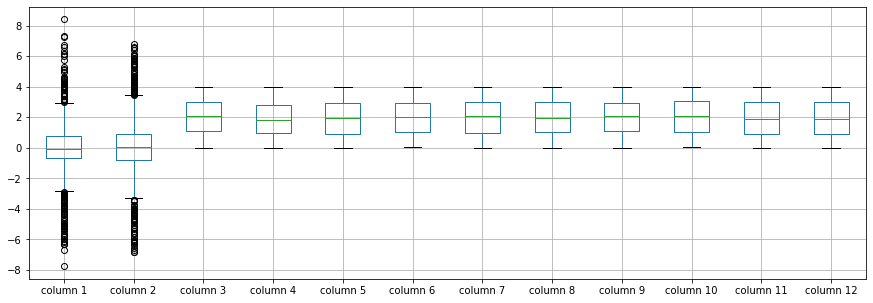

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.071601
column 2     0.085849
column 3     2.028252
column 4     1.903399
column 5     1.932594
column 6     1.974055
column 7     2.027328
column 8     1.980440
column 9     1.974501
column 10    2.013291
column 11    1.964104
column 12    1.951717
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.030289,-0.060408,-0.087986,-0.006555,-0.021267,-0.011061,0.017543,-0.025936,0.058815,0.079917,-0.015106
column 2,0.030289,1.000000,-0.056807,0.037762,-0.081408,-0.092667,0.016589,-0.032299,-0.017712,0.017323,-0.043392,0.060190
column 3,-0.060408,-0.056807,1.000000,0.017536,-0.016332,-0.059921,-0.095304,0.089178,0.108621,-0.034141,-0.093262,0.001285
column 4,-0.087986,0.037762,0.017536,1.000000,-0.015111,0.106350,0.011854,0.097776,-0.006506,0.090384,-0.023140,-0.062000
column 5,-0.006555,-0.081408,-0.016332,-0.015111,1.000000,0.072047,0.024920,0.011443,-0.009373,0.014109,0.005483,-0.049317
column 6,-0.021267,-0.092667,-0.059921,0.106350,0.072047,1.000000,-0.007569,0.058368,-0.000301,0.006446,0.016444,-0.038635
column 7,-0.011061,0.016589,-0.095304,0.011854,0.024920,-0.007569,1.000000,-0.032103,0.075480,0.028827,-0.002761,-0.053505
column 8,0.017543,-0.032299,0.089178,0.097776,0.011443,0.058368,-0.032103,1.000000,0.050505,-0.144375,-0.054020,-0.015197
column 9,-0.025936,-0.017712,0.108621,-0.006506,-0.009373,-0.000301,0.075480,0.050505,1.000000,0.006741,0.024621,0.063215
column 10,0.058815,0.017323,-0.034141,0.090384,0.014109,0.006446,0.028827,-0.144375,0.006741,1.000000,0.010792,0.026028


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+39,12+39+39,12+39+39+39,12+39+39+39+39,12+39+39+39+39+39,12+39+39+39+39+39+39,12+39+39+39+39+39+39+39,12+39+39+39+39+39+39,12+39+39+39+39+39,12+39+39+39+39,12+39+39+39,12+39+39,12+39,12], vae_layer = False, seed = 39)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.578558502197264
Epoch: 1 , loss: 27.531933670043944
Epoch: 2 , loss: 27.495674667358397
Epoch: 3 , loss: 27.106142654418946
Epoch: 4 , loss: 24.837509078979494
Epoch: 5 , loss: 22.867255935668947
Epoch: 6 , loss: 22.55380271911621
Epoch: 7 , loss: 22.143148803710936
Epoch: 8 , loss: 21.878848953247072
Epoch: 9 , loss: 21.664219207763672
Epoch: 10 , loss: 21.50999526977539
Epoch: 11 , loss: 21.137051391601563
Epoch: 12 , loss: 21.159832916259766
Epoch: 13 , loss: 20.771346740722656
Epoch: 14 , loss: 20.755053482055665
Epoch: 15 , loss: 20.737990798950197
Epoch: 16 , loss: 20.40405731201172
Epoch: 17 , loss: 20.254040985107423
Epoch: 18 , loss: 20.21383735656738
Epoch: 19 , loss: 20.203600158691405
Epoch: 20 , loss: 19.815211563110353
Epoch: 21 , loss: 19.65921821594238
Epoch: 22 , loss: 19.586393661499024
Epoch: 23 , loss: 19.466358261108397
Epoch: 24 , loss: 19.63936149597168
Epoch: 25 , loss: 19.33

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-2.128401,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(14.355125319282768, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.08792020669246506

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.783430,0.510350,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.194800,2.131800,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.902900,1.514400,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.661260,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.109400,3.656400,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.085000,0.157400,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.127900,0.542490,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.477300,0.954960,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.990590,1.308999,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NN_1(imp).xlsx", index=False, header=False)